# Decision Trees - Iris dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree #Librería para la creación del Decision Tree
import subprocess #Visualización del algoritmo
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# Importando el dataset (Iris)
from sklearn import datasets
bchIris = datasets.load_iris()
bchIris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
df_iris_species = pd.DataFrame(bchIris.target, 
                               columns=['target']).merge(pd.DataFrame(bchIris.target_names, columns=['species']),
                                                        left_on='target', right_index=True, how='inner')
df_iris = pd.concat([pd.DataFrame(bchIris.data, columns=bchIris.feature_names),
                    df_iris_species.species], axis=1)
df_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


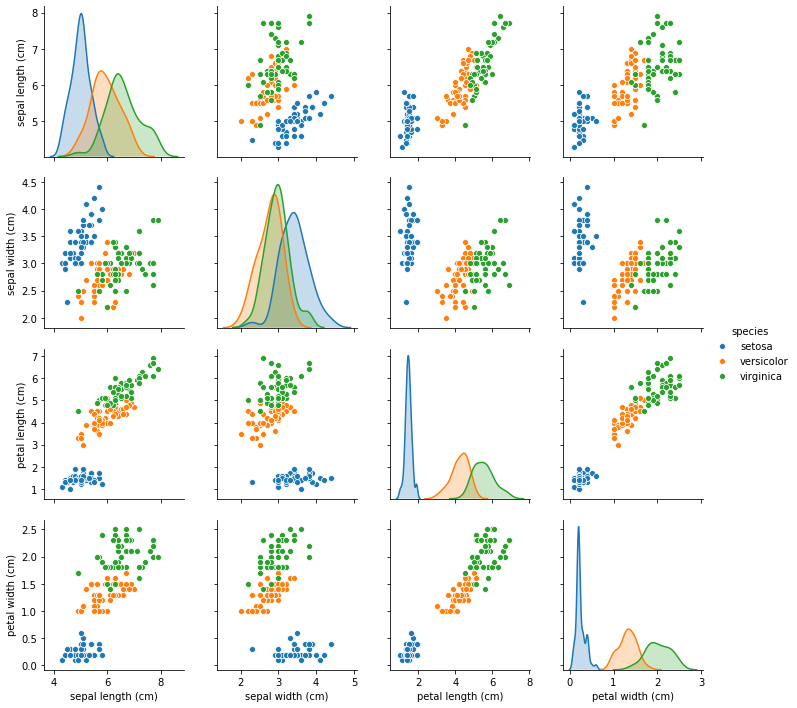

In [4]:
sns.pairplot(df_iris, hue='species', vars=bchIris.feature_names, diag_kind='kde')

In [5]:
# Construcción del arbol de decisión
clf = tree.DecisionTreeClassifier(random_state=0)
iris_clf = clf.fit(bchIris.data, bchIris.target)
iris_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [6]:
def visualize_tree(Tree, Feature_names, Class_names, TreeName):
    with open('dt.dot', 'w') as f:
        tree.export_graphviz(Tree, out_file = f,
                             feature_names = Feature_names, 
                            class_names = Class_names,
                            filled = True, rounded=True, special_characters=True) #Viene de la librería que se importó en la primera celda
    file = 'dt.dot'
    image = TreeName + '.png'
    command = ['dot', '-Tpng', file, '-o', image]
    subprocess.run(command, shell=True)
    return Image(image)

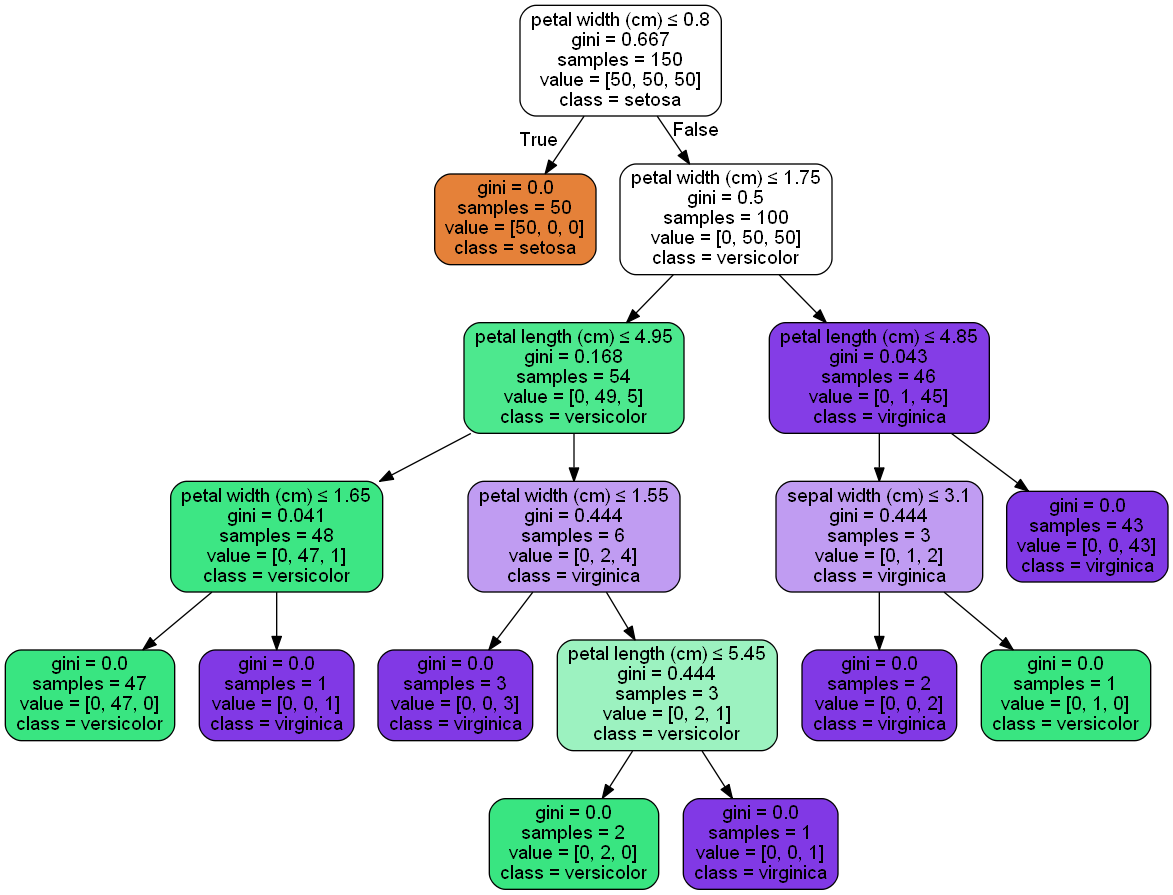

In [7]:
visualize_tree(iris_clf, bchIris.feature_names, bchIris.target_names, 'Iris_Gini')

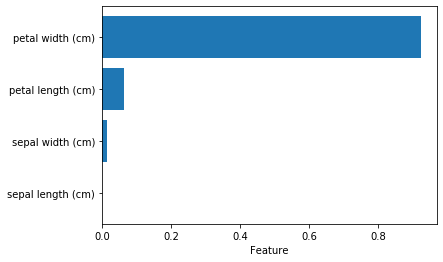

In [8]:
def plot_feature_importance(model):
    n_feature = bchIris.data.shape[1]
    plt.barh(range(n_feature), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feature), bchIris.feature_names)
    plt.xlabel('Feature')
plot_feature_importance(iris_clf)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = iris_clf.predict(bchIris.data)
print(confusion_matrix(bchIris.target, y_predict))
print(classification_report(bchIris.target, y_predict))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [10]:
arrays_index = [['REAL']*3, bchIris.target_names]
arrays_columns = [['PREDICTED']*3, bchIris.target_names]
pd.DataFrame(confusion_matrix(bchIris.target, y_predict), columns=arrays_columns, index=arrays_index)

PREDICTED                     
                   setosa versicolor virginica
REAL setosa            50          0         0
     versicolor         0         50         0
     virginica          0          0        50

## Decision Tree (predicción)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(bchIris.data, bchIris.target)

In [12]:
clf = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=10, min_samples_leaf=5)
iris_clf2 = clf.fit(X_train, Y_train)

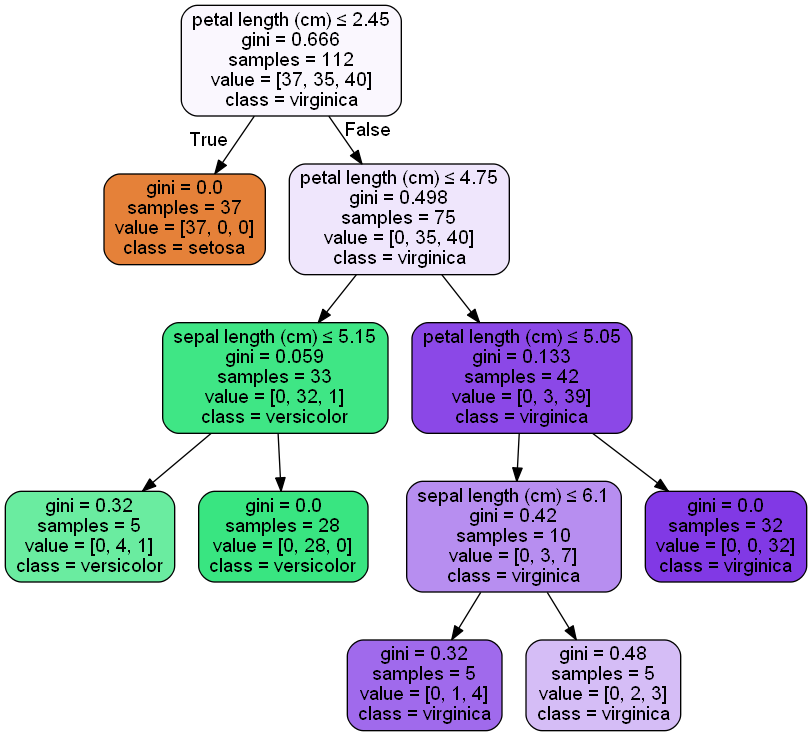

In [13]:
visualize_tree(iris_clf2, bchIris.feature_names, bchIris.target_names, 'Iris_Gini_train')

In [14]:
y_predict = iris_clf2.predict(X_test)
arrays_index = [['REAL']*3, bchIris.target_names]
arrays_columns = [['PREDICTED']*3, bchIris.target_names]
pd.DataFrame(confusion_matrix(Y_test,y_predict), columns=arrays_columns, index=arrays_index)

PREDICTED                     
                   setosa versicolor virginica
REAL setosa            13          0         0
     versicolor         0         12         3
     virginica          0          0        10

In [15]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.80      0.89        15
           2       0.77      1.00      0.87        10

    accuracy                           0.92        38
   macro avg       0.92      0.93      0.92        38
weighted avg       0.94      0.92      0.92        38



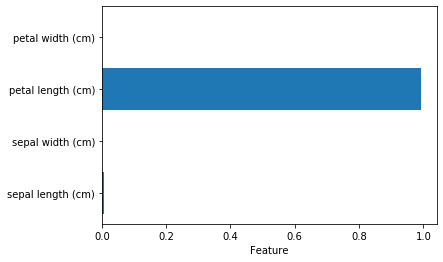

In [16]:
plot_feature_importance(iris_clf2)

In [17]:
clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=10, min_samples_leaf=5)
iris_clf3 = clf.fit(X_train, Y_train)
y_predict = iris_clf3.predict(X_test)
arrays_index = [['REAL']*3, bchIris.target_names]
arrays_columns = [['PREDICTED']*3, bchIris.target_names]
pd.DataFrame(confusion_matrix(Y_test,y_predict), columns=arrays_columns, index=arrays_index)

PREDICTED                     
                   setosa versicolor virginica
REAL setosa            13          0         0
     versicolor         0         12         3
     virginica          0          0        10

In [18]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.80      0.89        15
           2       0.77      1.00      0.87        10

    accuracy                           0.92        38
   macro avg       0.92      0.93      0.92        38
weighted avg       0.94      0.92      0.92        38



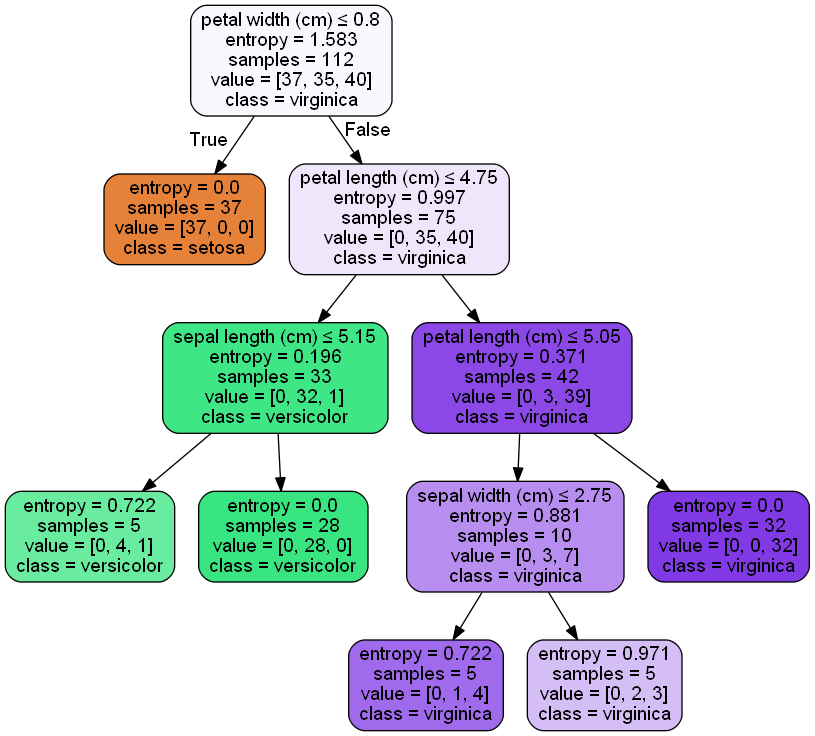

In [19]:
visualize_tree(iris_clf3, bchIris.feature_names, bchIris.target_names, 'Iris_Entropy_train')